In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/"

In [3]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [4]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [5]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [7]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [8]:
cali_inf = us.loc[:,["Time","Nevada"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,Nevada
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [9]:
cali_imp = impact.loc[impact.State == "Nevada",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,68,Nevada
1,3/17/2020,67,Nevada
2,3/18/2020,63,Nevada
3,3/19/2020,44,Nevada
4,3/20/2020,39,Nevada


In [10]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [11]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,68
1,3/17/2020,67
2,3/18/2020,63
3,3/19/2020,44
4,3/20/2020,39


In [12]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,45
1,10/10/2020,24
2,10/11/2020,31
3,10/12/2020,43
4,10/13/2020,49
...,...,...
209,9/5/2020,43
210,9/6/2020,36
211,9/7/2020,22
212,9/8/2020,64


In [13]:
cali_inf.to_csv(r"C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/states/nev_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/states/nev_imp.csv", index=False, header=True)

In [41]:
cali = pd.read_csv(data_dir + "nev.csv")
cali.head()

,Time,Nevada,PercentOfBaseline
0,3/16/2020,25,68.0
1,3/17/2020,10,67.0
2,3/18/2020,0,63.0
3,3/19/2020,40,44.0
4,3/20/2020,66,39.0


In [42]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [43]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [44]:
cali = cali.iloc[1:,:]
cali.head()

,index,Nevada,PercentOfBaseline,change
1,1,32.4,35.4,0.148936
2,2,137.8,27.4,3.253086
3,3,146.0,34.8,0.059507
4,4,142.8,35.0,-0.021918
5,5,135.6,25.2,-0.050420


In [45]:
N = 1
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()
cali = tmp1[:]
cali.head()
cali = cali.reset_index()

C:\Users\pelum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


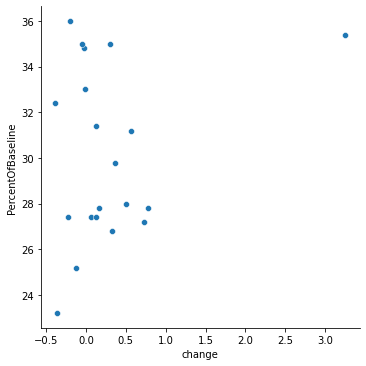

In [46]:
sns.relplot("change","PercentOfBaseline",data = cali)

C:\Users\pelum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='index', ylabel='change'>

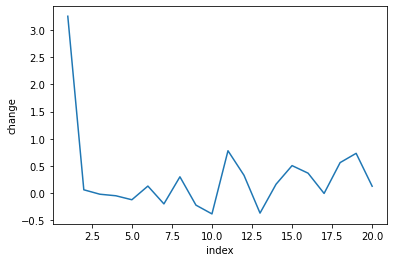

In [47]:
sns.lineplot("index","change",data = cali)

C:\Users\pelum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='index', ylabel='PercentOfBaseline'>

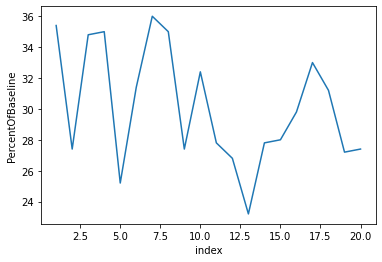

In [48]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [49]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.108
Method:                 Least Squares   F-statistic:                              3.422
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                      0.0800
Time:                        00:40:51   Log-Likelihood:                         -22.470
No. Observations:                  20   AIC:                                      46.94
Df Residuals:                      19   BIC:                                      47.94
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0104      0.006      1.850      0.080      -0.001       0.022
==============================================================================
Omnibus:                       35.847   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.587
Skew:                           2.872   Prob(JB):                     2.13e-20
Kurtosis:                      11.702   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
cali.to_csv(r"C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/best_r2/nev.csv", index=False, header=True)